# Exploratory Data Analysis

Intencionality of reviews written by bloggers or customers could be purely *descriptive*, telling readers what must they expect visiting one particular coffee shop or *argumentative*, sharing their own experience to incentive people going or not at the place. Every message contains one or all of those intencionalities and for extracting the maximum of possible information, polarity and subjectivity patterns are searching on each sentence into reviews.

Global analysis of reviews takes each one as a whole entity or **paragraph** and we looking for correlations between polarity patterns and scores. Then, they are splitting into **sentences** for discovering the intentionality of the parts of the message. Are people putting more emphasys and strong intention in positive or negative messages (polarity vs subjectivity)? About the location of the information on every paragraph, could be tested the law of primacy in persuasion? 

Considering that we have two sources of information, can we find differences in subjectivity and polarity distributions of bloggers and customers reviews?

What are the most popular words on positive and negative messages? Can we find the main topics of the paragraphs?

And finally, can we find any negative impact of bad scores/reviews on how much time takes to write the next review for a specific coffee shop? Inspecting the frequency of reviews/coffee shops, how much different are the distributions for positive gradients (positive review after than a negative), negative gradients (negative review after than a positive), consecutive-positive and consecutive negative?


Importing relevant packages

In [1]:
from textblob.sentiments import PatternAnalyzer
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

Defining the **sentiment parameters pattern** function using one of the sentiment analyzer provides for *TextBlob*

In [2]:
def sentiment_parameters_Pattern(sentence):
    blob = TextBlob(sentence, analyzer=PatternAnalyzer())
    return blob.sentiment.polarity, blob.sentiment.subjectivity

### Preparing Blog reviews to analysis

Merging all blogs in one dataset. A column of *Blog* is included

In [3]:
df = pd.read_csv('../Data_Extraction/Reviews/reviews_blog_a.csv', usecols=['Name', 'Description'])

In [4]:
df['Blog'] = 'A'
df = df.rename(index=str, columns={"Name": "Names", "Description": "Review"})

In [5]:
df1 = pd.read_csv('../Data_Extraction/Reviews/reviews_blogs_bc.csv', usecols=['Names', 'Wifi', 'Review', 'Blog'])

In [6]:
df1.head()

,Names,Wifi,Review,Blog
0,Beacon Coffee & Pantry,Yes,"If you live in North Beach, Beacon is your bes...",B
1,Contraband Coffeebar,Yes,The baristas at Contraband take their coffee s...,B
2,The Station SF,Yes,An almost perfect FiDi coffee shop for getting...,B
3,Mazarine Coffee,No,There’s no shame in loving a beautiful avocado...,B
4,Verve Coffee Roasters,Yes,Verve has almost everything you need for a ful...,B


In [7]:
df_blogs = df1.append(df, ignore_index=True, sort=False)

In [8]:
#sentiment = [sentiment_parameters_Pattern(r) for r in df['Review']]

In [9]:
polarity = [[sentiment_parameters_Pattern(sentence)[0] \
             for sentence in review.split('.')[:-1]] \
             for review in df_blogs['Review']]


In [10]:
subjectivity = [[sentiment_parameters_Pattern(sentence)[1] \
                 for sentence in review.split('.')[:-1]] \
                 for review in df_blogs['Review']]

In [11]:
p, blog, name = [], [], []
for x, y in enumerate(polarity):
    b = df_blogs['Blog'][x]
    n = df_blogs['Names'][x] 
    for elem in y:
        p.append(elem)
        blog.append(b)
        name.append(n)
        
s = []
for elem in subjectivity:
    for e in elem:
        s.append(e)

In [12]:
df_blogs_sentences = pd.DataFrame({'Name': name,
                             'Blog': blog,
                             'Polarity_Pattern': p,
                             'Subjectivity_Pattern': s
                             })

In [13]:
df_blogs_sentences = df_blogs_sentences.sort_values('Blog')

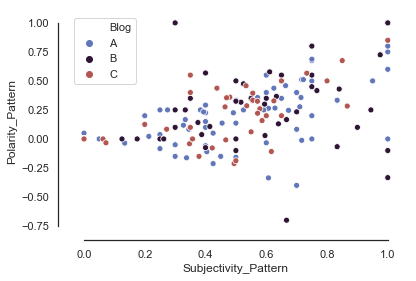

In [14]:
import seaborn as sns

_ = sns.set(style="white")
_ = sns.scatterplot(x="Subjectivity_Pattern", y="Polarity_Pattern",
                    hue="Blog", palette="twilight",
                    data=df_blogs_sentences)
_ = sns.despine(offset=10, trim=True)

The most part of data is concentrates on positive polarity (between 0 and 1) and almost all sentences are not extremely objective or subjective. 

### Global sentiment analysis of customers reviews

In [15]:
df_reviews = pd.read_csv("../Data_Extraction/Reviews/reviews_rating_date.csv", \
                         usecols=['Coffee', 'Description','Rating', 'date'])

In [16]:
df_reviews['scores'] = df_reviews['Rating'].str.split(' star rating').str.get(0).astype(float)

In [17]:
df_reviews['Polarity_Pattern'] = [sentiment_parameters_Pattern(r)[0] for r in df_reviews['Description']]

In [18]:
df_reviews['Subjectivity_Pattern'] = [sentiment_parameters_Pattern(r)[1] for r in df_reviews['Description']]

In [19]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 7 columns):
Coffee                  3268 non-null object
Description             3548 non-null object
Rating                  3548 non-null object
date                    3548 non-null object
scores                  3548 non-null float64
Polarity_Pattern        3548 non-null float64
Subjectivity_Pattern    3548 non-null float64
dtypes: float64(3), object(4)
memory usage: 194.1+ KB


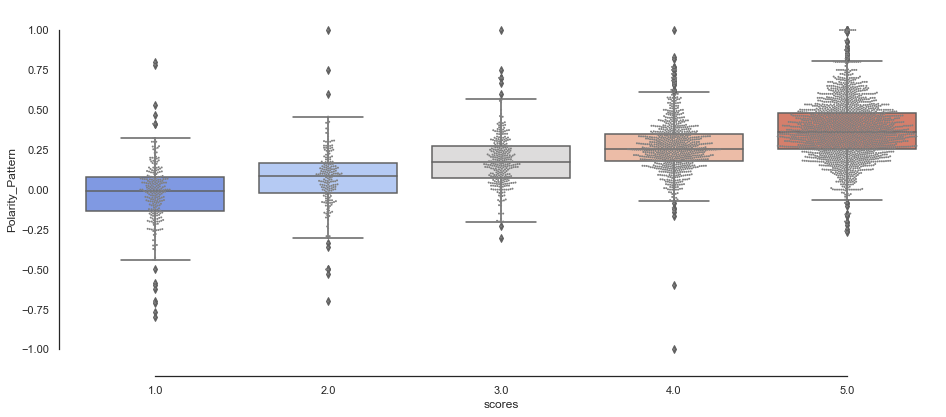

In [20]:
f, ax = plt.subplots(figsize=(15.5, 6.5))
_ = sns.set(style="whitegrid", palette="muted")
_ = sns.boxplot(x="scores", y="Polarity_Pattern", data=df_reviews, palette="coolwarm")
_ = sns.swarmplot(x="scores", y="Polarity_Pattern", data=df_reviews, size=2, color=".5", linewidth=0)
_ = sns.despine(offset=10, trim=True)

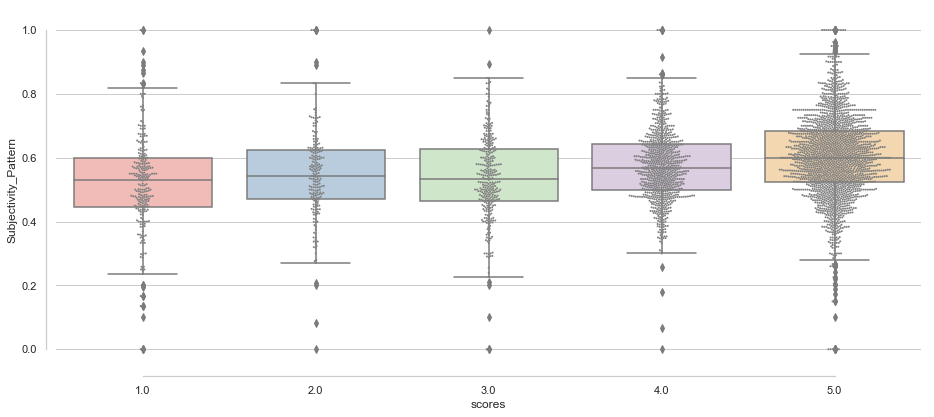

In [21]:
f, ax = plt.subplots(figsize=(15.5, 6.5))
_ = sns.set(style="whitegrid", palette="muted")
_ = sns.boxplot(x="scores", y="Subjectivity_Pattern", data=df_reviews, palette="Pastel1")
_ = sns.swarmplot(x="scores", y="Subjectivity_Pattern", data=df_reviews, size=2, color=".5", linewidth=0)
_ = sns.despine(offset=10, trim=True)

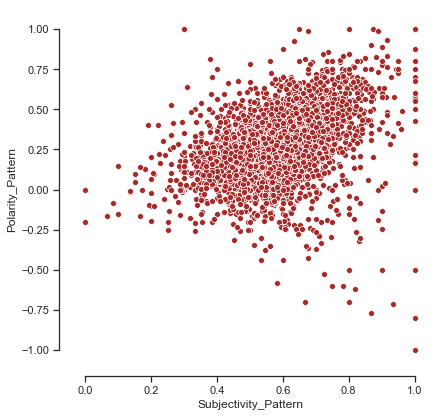

In [22]:
_ = sns.set(style="ticks")
f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.scatterplot(x="Subjectivity_Pattern", y="Polarity_Pattern",
                     data=df_reviews, color='brown')
_ = sns.despine(offset=10, trim=True)

### Polarity and subjectiviy on sentences

In [23]:
polarity = [[sentiment_parameters_Pattern(sentence)[0] \
             for sentence in review.split('.')[:-1]] \
             for review in df_reviews['Description']]

In [24]:
subjectivity = [[sentiment_parameters_Pattern(sentence)[1] \
                 for sentence in review.split('.')[:-1]] \
                 for review in df_reviews['Description']]

In [25]:
p, rating, name, date = [], [], [], []
n_review = []
n_sentences = []
for x, y in enumerate(polarity):
    r = df_reviews['scores'][x]
    n = df_reviews['Coffee'][x] 
    d = df_reviews['date'][x]
    k = 1
    for elem in y:
        p.append(elem)
        rating.append(r)
        name.append(n)
        date.append(d)
        n_review.append(x)
        n_sentences.append(k)
        k+=1

In [26]:
s = []
for elem in subjectivity:
    for e in elem:
        s.append(e)

In [27]:
df_reviews_sentences = pd.DataFrame({'Name': name,
                                     'Rating': rating,
                                     'Date': date,
                                     'Review': n_review,
                                     'Sentence': n_sentences,
                                     'Polarity_Pattern': p,
                                     'Subjectivity_Pattern': s
                                     })

In [28]:
df_reviews_sentences.head()

,Name,Rating,Date,Review,Sentence,Polarity_Pattern,Subjectivity_Pattern
0,Réveille Coffee,4.0,5/10/2019,0,1,0.600000,0.783333
1,Réveille Coffee,4.0,5/10/2019,0,2,-0.097917,0.722917
2,Réveille Coffee,4.0,5/10/2019,0,3,0.283333,0.625000
3,Réveille Coffee,4.0,5/10/2019,0,4,0.000000,0.000000
4,Réveille Coffee,2.0,4/20/2019,1,1,-0.400000,0.600000


In [29]:
df_reviews_sentences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20068 entries, 0 to 20067
Data columns (total 7 columns):
Name                    18490 non-null object
Rating                  20068 non-null float64
Date                    20068 non-null object
Review                  20068 non-null int64
Sentence                20068 non-null int64
Polarity_Pattern        20068 non-null float64
Subjectivity_Pattern    20068 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.1+ MB


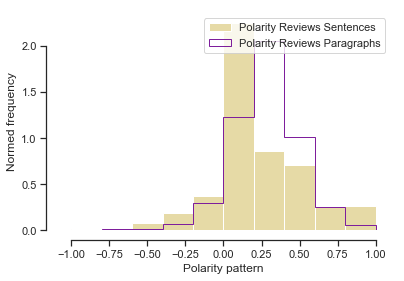

In [30]:
_ = sns.set(style="ticks")
_ = plt.hist(df_reviews_sentences['Polarity_Pattern'], density=True, histtype = 'bar', color='xkcd:beige', label='Polarity Reviews Sentences')
_ = plt.hist(df_reviews['Polarity_Pattern'], density=True, histtype = 'step', color='xkcd:purple', label='Polarity Reviews Paragraphs')
_ = plt.xlabel('Polarity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)


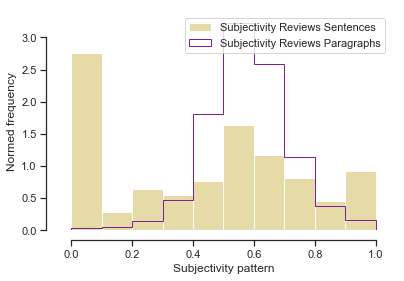

In [31]:
_ = sns.set(style="ticks")
_ = plt.hist(df_reviews_sentences['Subjectivity_Pattern'], density=True, histtype = 'bar', color='xkcd:beige', label='Subjectivity Reviews Sentences')
_ = plt.hist(df_reviews['Subjectivity_Pattern'], density=True, histtype = 'step', color='xkcd:purple', label='Subjectivity Reviews Paragraphs')
_ = plt.xlabel('Subjectivity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

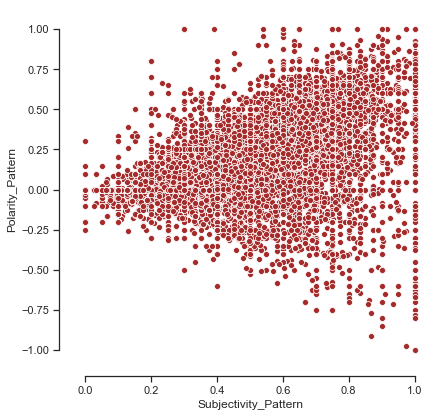

In [32]:
_ = sns.set(style="ticks")
f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.scatterplot(x="Subjectivity_Pattern", y="Polarity_Pattern",
                     data=df_reviews_sentences, color='brown')
_ = sns.despine(offset=10, trim=True)

In [33]:
#Random paired sample
import numpy as np

def random_paired_sampling(data1, data2, n):
    
    p = np.empty(n)
    
    for i in range(n):
        inds = np.arange(len(data1))
        bs_inds = np.random.choice(inds, n)
        sampling_data1 = data1[bs_inds]
        sampling_data2 = data2[bs_inds]
    
    return sampling_data1, sampling_data2

In [34]:
np.random.seed(42)
polarity_sample, subjectivity_sample = random_paired_sampling(df_reviews_sentences['Polarity_Pattern'], \
                                                              df_reviews_sentences['Subjectivity_Pattern'], 1000)

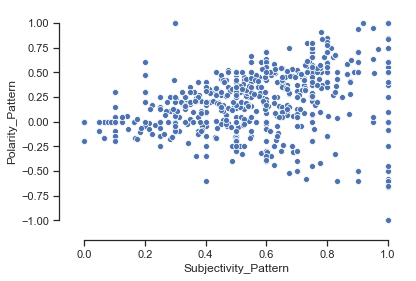

In [35]:
#f, ax = plt.subplots(figsize=(6.5, 6.5))
_ = sns.set(style="ticks")
_ = sns.scatterplot(x=subjectivity_sample, y=polarity_sample)
_ = sns.despine(offset=10, trim=True)

In [36]:
def normed_histogram(data, edgecolor, color='None', label='None'):
    value, bin_edges = np.histogram(data, density=True, bins=10)
    width = bin_edges[1]-bin_edges[0]
    value = value/float(max(value))
    _ = plt.bar(bin_edges[:-1], value, width = width, align='edge', \
                edgecolor=edgecolor, color=color, label=label)

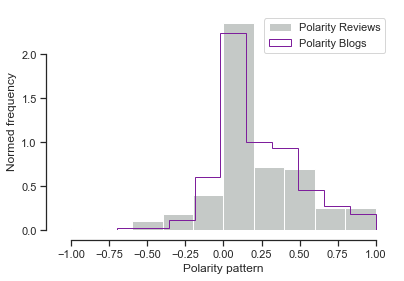

In [37]:
_ = sns.set(style="ticks")
_ = plt.hist(polarity_sample, density=True, histtype = 'bar', color='xkcd:silver', label='Polarity Reviews')
_ = plt.hist(df_blogs_sentences['Polarity_Pattern'], density=True, histtype = 'step', color='xkcd:purple', label='Polarity Blogs')
_ = plt.xlabel('Polarity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

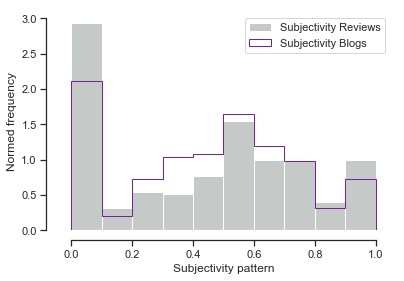

In [38]:
_ = sns.set(style="ticks")
_ = plt.hist(subjectivity_sample, density=True, histtype = 'bar', \
             color='xkcd:silver', label='Subjectivity Reviews')
_ = plt.hist(df_blogs_sentences['Subjectivity_Pattern'], density=True, \
             histtype = 'step', color='xkcd:purple', label='Subjectivity Blogs')
_ = plt.xlabel('Subjectivity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

In [39]:
import numpy as np
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)
    # Return entry [0,1]
    return corr_mat[0,1]

In [40]:
p_obs = pearson_r(polarity_sample, subjectivity_sample)
p_obs

0.4674881860240767

In [41]:
#Paired Bootstrap 
def pairs_bootstrap(data1, data2, func, n):
    
    p = np.empty(n)
    
    for i in range(n):
        inds = np.arange(len(data1))
        bs_inds = np.random.choice(inds, len(data1))
        bs_data1 = data1[bs_inds]
        bs_data2 = data2[bs_inds]
    
        p[i] = func(bs_data1, bs_data2)
    
    return p

In [42]:
pearson = pairs_bootstrap(df_reviews_sentences['Polarity_Pattern'], \
                          df_reviews_sentences['Subjectivity_Pattern'], \
                          pearson_r, 1000)

In [43]:
p_value = np.sum(pearson >= p_obs)/len(pearson)
p_value

0.813

In [44]:
if p_value >= 0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Fail to reject the null hypothesis


We can't reject the null hypothesis. There is significance statistics that suggest a relation between the polarity and subjectivity patterns of the reviews.

What about the polarity distribution of bloggers and customers? Are they similar distributions?

Firstly, we inspect a polarity blog and yelp customers boxplot.

In [45]:
np.random.seed(42)
polarity_sample1, rating_sample1 = random_paired_sampling(df_reviews_sentences['Polarity_Pattern'], \
                                                              df_reviews_sentences['Rating'], 1000)

In [46]:
pearson_pol_rating_obs = pearson_r(polarity_sample1, \
                                    rating_sample1)
pearson_pol_rating_obs

0.3028062187484568

In [47]:
pearson_pol_rating = pairs_bootstrap(df_reviews_sentences['Polarity_Pattern'], \
                          df_reviews_sentences['Rating'], \
                          pearson_r, 1000)

In [48]:
p_value1 = np.sum(pearson_pol_rating >= pearson_pol_rating_obs)/len(pearson_pol_rating)
p_value1

0.136

In [49]:
if p_value1 >= 0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Fail to reject the null hypothesis


Test law of primacy in persuasion

In [50]:
df_reviews.head()

,Coffee,Description,Rating,date,scores,Polarity_Pattern,Subjectivity_Pattern
0,Réveille Coffee,"This is a cute coffee shop, I love the ambianc...",4.0 star rating,5/10/2019,4.0,0.250758,0.692424
1,Réveille Coffee,"I wanted to like this place, however the venti...",2.0 star rating,4/20/2019,2.0,0.051736,0.624306
2,Réveille Coffee,I didn't tried brunch before in another locati...,5.0 star rating,4/18/2019,5.0,0.666667,0.616667
3,Réveille Coffee,"Folks, avoid this place unless you like being ...",1.0 star rating,4/16/2019,1.0,0.070000,0.607778
4,Réveille Coffee,A nice compact coffee shop at Castro area. Qua...,4.0 star rating,4/16/2019,4.0,0.390000,0.610000


In [51]:
n_review, rating, position, subjectivity, polarity, category = [], [], [], [], [], []

for i in range(df_reviews.shape[0]):
    paragrahp = df_reviews['Description'][i].split('.')[:-1]
    k = 1
    n = i
    for sentence in paragrahp:
        p, s = sentiment_parameters_Pattern(sentence)
        r = df_reviews['scores'][i]
        n_review.append(n)
        rating.append(r)
        position.append(k)
        subjectivity.append(s)
        polarity.append(p)
        threshold = len(paragrahp)/2
        if threshold%2 == 0: #par
            if k <= threshold:
                c = 'A'
            else:
                c = 'B'
        else:
            if k < np.ceil(threshold):
                c = 'A'
            elif k > np.ceil(threshold):
                c = 'B'
            else:
                c = 0
        category.append(c)
        k +=1

In [52]:
df_persuasion = pd.DataFrame({'no_review': n_review, 'scores': rating, 
              'position': position, 'subjectivity': subjectivity, 
              'polarity': polarity, 'category': category})

In [53]:
df_persuasion.head()

,no_review,scores,position,subjectivity,polarity,category
0,0,4.0,1,0.783333,0.600000,A
1,0,4.0,2,0.722917,-0.097917,A
2,0,4.0,3,0.625000,0.283333,B
3,0,4.0,4,0.000000,0.000000,B
4,1,2.0,1,0.600000,-0.400000,A


In [54]:
negative_data = df_persuasion[df_persuasion['scores'] < 2]
positive_data = df_persuasion[df_persuasion['scores'] > 4]
neutral_data = df_persuasion[df_persuasion['scores'] == 3]

negative_data.head()

,no_review,scores,position,subjectivity,polarity,category
14,3,1.0,1,0.0,0.000000,A
15,3,1.0,2,0.6,0.144444,A
16,3,1.0,3,0.7,-0.400000,A
17,3,1.0,4,0.0,0.000000,A
18,3,1.0,5,0.0,0.000000,A


In [55]:
n_A = negative_data[negative_data['category'] == 'A']
n_B = negative_data[negative_data['category'] == 'B']

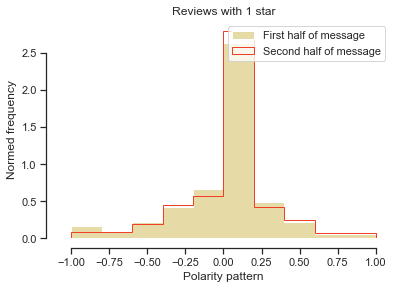

In [56]:
_ = sns.set(style="ticks")
_ = plt.hist(n_A['polarity'], density=True, histtype = 'stepfilled', color='xkcd:beige', label='First half of message')
_ = plt.hist(n_B['polarity'], density=True, histtype = 'step', color='xkcd:tomato', label='Second half of message')
_ = plt.xlabel('Polarity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = plt.title('Reviews with 1 star')
_ = sns.despine(offset=10, trim=True)

In [57]:
print(np.mean(n_A['polarity']) - np.mean(n_B['polarity']))

-0.021257292074276245


In [58]:
def bootstrap_replicate_1d(data, size):
    return np.random.choice(data, size=size)

In [59]:
from scipy.stats import ttest_rel

ttest = np.empty(1000)
pval = np.empty(1000)
diff = np.empty(1000)

for i in range(1000):
    boot_data = bootstrap_replicate_1d(n_A['polarity'], len(n_B['polarity']))
    ttest[i], pval[i] = ttest_rel(boot_data, n_B['polarity'])
    diff[i] = np.mean(boot_data) - np.mean(n_B['polarity'])
   
p1 = np.sum(pval >= 0.05)/len(pval)
p_diff = np.sum(diff < 0)/len(diff)

p_diff

0.977

In [60]:
p_A = positive_data[positive_data['category'] == 'A']
p_B = positive_data[positive_data['category'] == 'B']

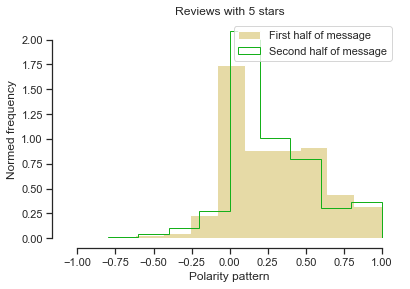

In [61]:
_ = sns.set(style="ticks")
_ = plt.hist(p_A['polarity'], density=True, histtype = 'stepfilled', color='xkcd:beige', label='First half of message')
_ = plt.hist(p_B['polarity'], density=True, histtype = 'step', color='xkcd:green', label='Second half of message')
_ = plt.xlabel('Polarity pattern')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = plt.title('Reviews with 5 stars')
_ = sns.despine(offset=10, trim=True)

In [62]:
print(np.mean(p_A['polarity']) - np.mean(p_B['polarity']))

0.027570531256396413


In [63]:
ttest = np.empty(1000)
pval = np.empty(1000)
diff = np.empty(1000)

for i in range(1000):
    boot_data = bootstrap_replicate_1d(p_A['polarity'], len(p_B['polarity']))
    ttest[i], pval[i] = ttest_rel(boot_data, p_B['polarity'])
    diff[i] = np.mean(boot_data) - np.mean(p_B['polarity'])
   
p2 = np.sum(pval >= 0.05)/len(pval)
p_diff = np.sum(diff > 0)/len(diff)
p_diff

1.0

In [64]:
# size = 10000
# for i in range(size):
#     polarity_perm = np.random.permutation(df_story['Polarity_Pattern'])
#     person_replicates[i] = pearson_r(polarity_perm, df_story['Subjectivity_Pattern'])

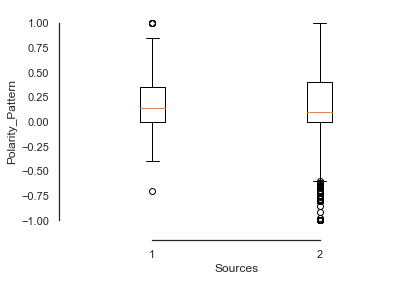

In [65]:
_ = sns.set_style("white")
_ = plt.boxplot([df_blogs_sentences['Polarity_Pattern'], df_reviews_sentences['Polarity_Pattern']])
_ = plt.xlabel('Sources')
_ = plt.ylabel('Polarity_Pattern')
_ = sns.despine(offset=10, trim=True)

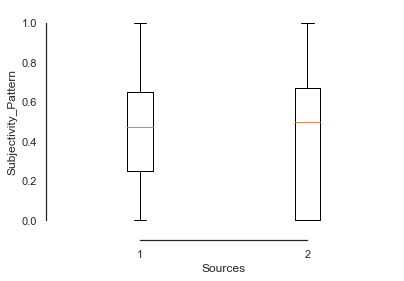

In [66]:
_ = sns.set_style("white")
_ = plt.boxplot([df_blogs_sentences['Subjectivity_Pattern'], df_reviews_sentences['Subjectivity_Pattern']])
_ = plt.xlabel('Sources')
_ = plt.ylabel('Subjectivity_Pattern')
_ = sns.despine(offset=10, trim=True)

In [67]:
from scipy import stats

def delete_outliers(x, y):
    z = np.abs(stats.zscore(y))
    threshold = 3
    inds = np.where(np.abs(z)<= 3)
    return [x[i] for i in inds[0]], [y[i] for i in inds[0]]

In [68]:
x_review, y_review  = delete_outliers(df_reviews_sentences['Subjectivity_Pattern'], df_reviews_sentences['Polarity_Pattern'])


In [69]:
x_blog, y_blog = delete_outliers(df_blogs_sentences['Subjectivity_Pattern'], df_blogs_sentences['Polarity_Pattern'])

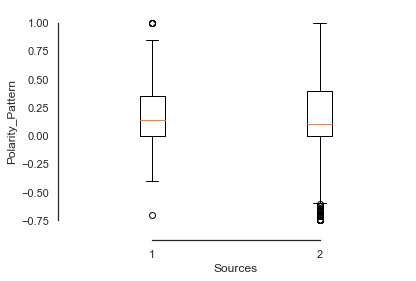

In [70]:
_ = sns.set_style("white")
_ = plt.boxplot([y_blog, y_review])
_ = plt.xlabel('Sources')
_ = plt.ylabel('Polarity_Pattern')
_ = sns.despine(offset=10, trim=True)

In [71]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y 

In [72]:
i_review, j_review = ecdf(y_review)
i_blog, j_blog = ecdf(y_blog)

i_review_theoric, j_review_theoric = ecdf(np.random.normal(np.mean(y_review),np.std(y_review),len(y_review)))
i_blog_theoric, j_blog_theoric = ecdf(np.random.normal(np.mean(y_blog),np.std(y_blog),len(y_blog)))

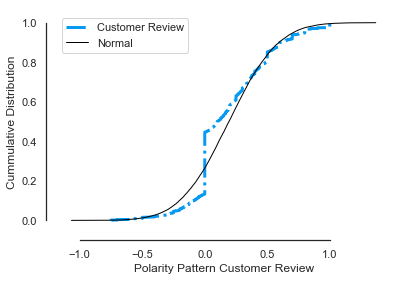

In [73]:
_ = sns.set_style("white")
_ = plt.plot(i_review, j_review, linestyle='-.', color='xkcd:azure', label='Customer Review', linewidth=3)
_ = plt.plot(i_review_theoric, j_review_theoric, linestyle='-', label ='Normal', color='black', linewidth=1)
_ = plt.ylabel('Cummulative Distribution')
_ = plt.xlabel('Polarity Pattern Customer Review')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

plt.show()

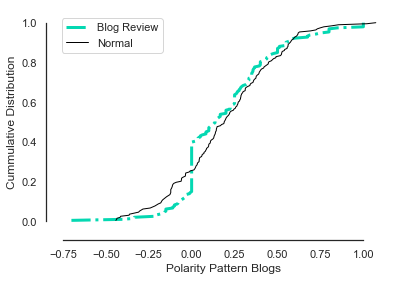

In [74]:
_ = sns.set_style("white")
_ = plt.plot(i_blog, j_blog, linestyle='-.', color='xkcd:aquamarine', label='Blog Review', linewidth=3)
_ = plt.plot(i_blog_theoric, j_blog_theoric, linestyle='-', label ='Normal', color='black', linewidth=1)
_ = plt.ylabel('Cummulative Distribution')
_ = plt.xlabel('Polarity Pattern Blogs')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

plt.show()

In [75]:
t_stats, p_value = stats.ttest_ind(x_blog, x_review, equal_var = False)
p_value

0.4441101194896797

In [76]:
if p_value >= 0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

Fail to reject the null hypothesis


We fail to reject the null hypothesis, with a p > 0.05. It means that distributions of Polarity on reviews from customers and bloggers are not significativally different.

We used a t-test for two different population. Now, we know that the average (expected) value doesn't differ significantly across samples. The p-value founded suggest that we **can't reject the null hypothesis of identical average score between customers reviews and blog reviews**.

### How much do wrong rankings affect new people try the coffee shop?


In [77]:
coffee_serie = df_reviews['Coffee']

In [78]:
coffee_serie[20:40] = 'Coffee 1'
coffee_serie[40:60] = 'Coffee 2'
coffee_serie[60:80] = 'The Mill'
coffee_serie[1939:1959] = 'The Mill 1'
coffee_serie[1200:1220] = 'Andytown Coffee 1'
coffee_serie[1691:1711] = 'Réveille Coffee 1'
coffee_serie[340:360] = 'Sightglass 1'
coffee_serie[780:800] = 'Sightglass 2'
coffee_serie[2439:2459] = 'Sightglass 3'
coffee_serie[940:960] = 'Saint Frank 2'
coffee_serie[800:820] = 'Philz 1'
coffee_serie[2739:2759] = 'Philz 2'
coffee_serie[3228:3248] = 'Philz 3'
coffee_serie[700:720] = 'Blue Bottle 1'
coffee_serie[2119:2139] = 'Blue Bottle 2'
coffee_serie[2499:2519] = 'Blue Bottle 3'
coffee_serie[2299:2319] = 'Jane on 1'
coffee_serie[2159:2179] = 'Equator Coffees & 1'
coffee_serie[2399:2419] = 'Equator Coffees & 2'
coffee_serie[3172:3192] = 'Contraband Coffee 1'
coffee_serie[2859:2879] = 'Little 1'
coffee_serie[1471:1491] = 'Cafe 1'
coffee_serie[2599:2619] = 'Cafe 2'
coffee_serie[2962:2982] = 'Cafe 3'
coffee_serie[3122:3132] = 'Bluestone 1'
coffee_serie[3528:3548] = 'Red Door 1'
coffee_serie[2339:2359] = 'Martha & Brothers 1'
coffee_serie[3042:3062] = 'Boba 1'
coffee_serie[3102:3122] = 'Boba 2'

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [79]:
import datetime

format_str = '%m/%d/%Y'
date = [datetime.datetime.strptime(date[:10].rstrip(), format_str) for date in df_reviews['date']]

In [80]:
df_reviews['date_time'] = date
df_reviews_nonull = df_reviews.dropna()

In [81]:
df_reviews_nonull.head()

,Coffee,Description,Rating,date,scores,Polarity_Pattern,Subjectivity_Pattern,date_time
0,Réveille Coffee,"This is a cute coffee shop, I love the ambianc...",4.0 star rating,5/10/2019,4.0,0.250758,0.692424,2019-05-10
1,Réveille Coffee,"I wanted to like this place, however the venti...",2.0 star rating,4/20/2019,2.0,0.051736,0.624306,2019-04-20
2,Réveille Coffee,I didn't tried brunch before in another locati...,5.0 star rating,4/18/2019,5.0,0.666667,0.616667,2019-04-18
3,Réveille Coffee,"Folks, avoid this place unless you like being ...",1.0 star rating,4/16/2019,1.0,0.070000,0.607778,2019-04-16
4,Réveille Coffee,A nice compact coffee shop at Castro area. Qua...,4.0 star rating,4/16/2019,4.0,0.390000,0.610000,2019-04-16


In [82]:
l = df_reviews_nonull['Coffee'].unique()

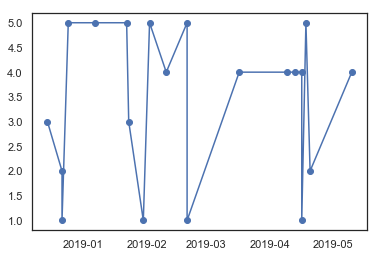

In [83]:
df_indexed = df_reviews_nonull.set_index('Coffee')
plt.plot(df_indexed.loc[[l[0]],'date_time'], df_indexed.loc[[l[0]],'scores'], marker='o')

In [84]:
df_reviews_nonull['delta_time'] = df_reviews_nonull['date_time'] - df_reviews_nonull['date_time'].shift(-1)

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
df_reviews_nonull['delta_scores'] = df_reviews_nonull['scores'].shift(-1) - df_reviews_nonull['scores']

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
df_reviews_nonull.head()

,Coffee,Description,Rating,date,scores,Polarity_Pattern,Subjectivity_Pattern,date_time,delta_time,delta_scores
0,Réveille Coffee,"This is a cute coffee shop, I love the ambianc...",4.0 star rating,5/10/2019,4.0,0.250758,0.692424,2019-05-10,20 days,-2.0
1,Réveille Coffee,"I wanted to like this place, however the venti...",2.0 star rating,4/20/2019,2.0,0.051736,0.624306,2019-04-20,2 days,3.0
2,Réveille Coffee,I didn't tried brunch before in another locati...,5.0 star rating,4/18/2019,5.0,0.666667,0.616667,2019-04-18,2 days,-4.0
3,Réveille Coffee,"Folks, avoid this place unless you like being ...",1.0 star rating,4/16/2019,1.0,0.070000,0.607778,2019-04-16,0 days,3.0
4,Réveille Coffee,A nice compact coffee shop at Castro area. Qua...,4.0 star rating,4/16/2019,4.0,0.390000,0.610000,2019-04-16,3 days,0.0


In [87]:
df_reviews_nonull['delta_time_float'] = [delta.total_seconds()/(24*3600) for delta in df_reviews_nonull['delta_time']]

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


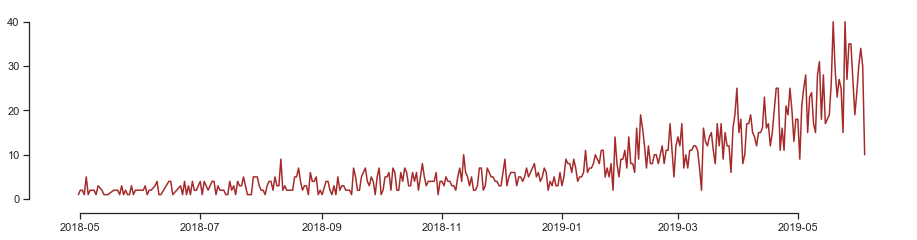

In [88]:
time_serie = df_reviews_nonull.groupby('date_time').count()['Coffee']

_ = sns.set(style="ticks")
f, ax = plt.subplots(figsize=(15.5, 3.5))
_ = plt.plot(time_serie[200:], color='brown')
_ = sns.despine(offset=10, trim=True)

In [89]:
#Clean data. delta time must be less than 15 days. Then use only coffee shops with more than 15 reviews and less than 30
df_delta_time_filter = df_reviews_nonull[(df_reviews_nonull['delta_time_float'] <= 15) & (df_reviews_nonull['delta_time_float'] >= 0)]

#print(df_delta_time_filter.groupby(['Coffee']).size() > 15) & (df_delta_time_filter.groupby(['Coffee']).size() < 30)
delete_names = ['Blue Bottle', 'Bluestone 1', 'Cafe 1','Tan Tan Coffee', 'The Laundry', 'Vive La', 'Song Tea &', 'Aroma Tea ']

In [90]:
df_delta_time_filter_valid_coffee = df_delta_time_filter[(df_delta_time_filter['Coffee'] != 'Blue Bottle') \
                                  & (df_delta_time_filter['Coffee'] != 'Bluestone 1') \
                                  & (df_delta_time_filter['Coffee'] != 'Cafe 1') \
                                  & (df_delta_time_filter['Coffee'] != 'Tan Tan Coffee') \
                                  & (df_delta_time_filter['Coffee'] != 'The Laundry') \
                                  & (df_delta_time_filter['Coffee'] != 'Vive La') \
                                  & (df_delta_time_filter['Coffee'] != 'Song Tea &') \
                                  & (df_delta_time_filter['Coffee'] != 'Aroma Tea ')]

l_coffee_filtered = df_delta_time_filter_valid_coffee['Coffee'].unique()

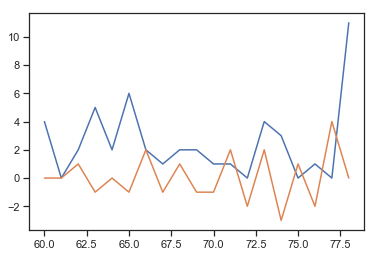

In [91]:
df_l = df_delta_time_filter_valid_coffee[df_delta_time_filter_valid_coffee['Coffee']==l_coffee_filtered[3]]
plt.plot(df_l['delta_time_float'][:])
plt.plot(df_l['delta_scores'][:])

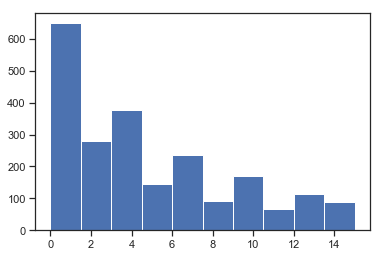

In [92]:
_ = plt.hist(df_delta_time_filter_valid_coffee['delta_time_float'])

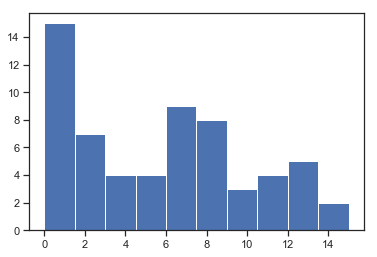

In [93]:
df_positive_delta_score = df_delta_time_filter_valid_coffee[df_delta_time_filter_valid_coffee['delta_scores'] >=4]
_ = plt.hist(df_positive_delta_score['delta_time_float'])

In [94]:
mean = np.mean(df_positive_delta_score['delta_time_float'])
var = np.var(df_positive_delta_score['delta_time_float'])
print (np.percentile(df_positive_delta_score['delta_time_float'], [25, 75]))


print (mean, var)

[2. 8.]
5.60655737704918 19.12389142703574


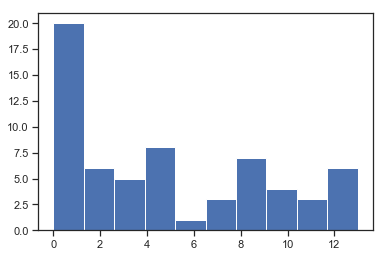

In [95]:
df_negative_delta_score = df_delta_time_filter_valid_coffee[df_delta_time_filter_valid_coffee['delta_scores'] <= -4]
_ = plt.hist(df_negative_delta_score['delta_time_float'])

In [96]:
mean_x = np.mean(df_negative_delta_score['delta_time_float'])
var_x = np.var(df_negative_delta_score['delta_time_float'])

print (np.percentile(df_negative_delta_score['delta_time_float'], [25, 75]))

print (mean_x, var_x)

[1. 9.]
4.920634920634921 17.660367850844043


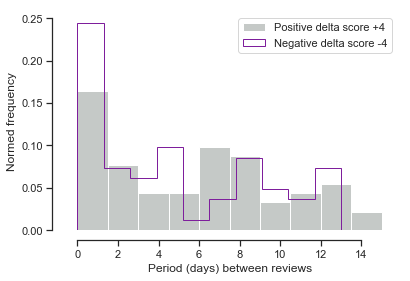

In [97]:
_ = sns.set(style="ticks")
_ = plt.hist(df_positive_delta_score['delta_time_float'], density=True, histtype = 'bar', \
             color='xkcd:silver', label='Positive delta score +4')
_ = plt.hist(df_negative_delta_score['delta_time_float'], density=True, \
             histtype = 'step', color='xkcd:purple', label='Negative delta score -4')
_ = plt.xlabel('Period (days) between reviews')
_ = plt.ylabel('Normed frequency')
_ = plt.legend()
_ = sns.despine(offset=10, trim=True)

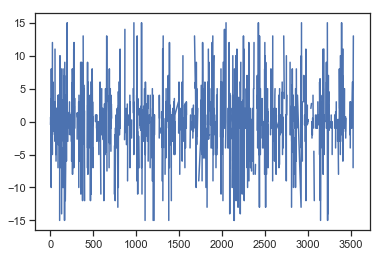

In [98]:
gradient = df_delta_time_filter_valid_coffee['delta_time_float']/df_delta_time_filter_valid_coffee['delta_scores']
plt.plot(gradient)

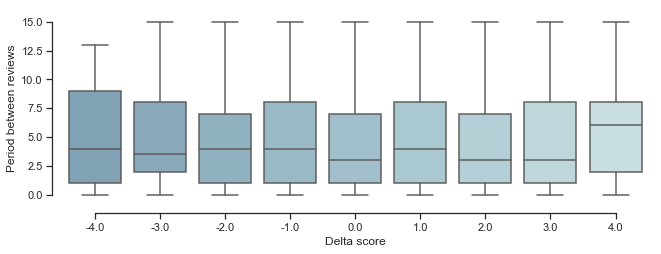

In [99]:
df_filter_plot = df_delta_time_filter_valid_coffee[np.abs(df_delta_time_filter_valid_coffee['delta_scores']) >= 3]

f, ax = plt.subplots(figsize=(10.5, 3.5))

_ = sns.set(style="ticks")
_ = sns.boxplot(x='delta_scores', y='delta_time_float',
              palette="ch:r=-.2,d=.6_r",
              data=df_delta_time_filter_valid_coffee)
_ = sns.despine(offset=10, trim=True)
_ = plt.xlabel('Delta score')
_ = plt.ylabel('Period between reviews')

Tiempo entre reviews positivos y negativos


In [100]:
df_filter2 = df_reviews_nonull[df_reviews_nonull['scores'] >= 4]

In [101]:
df_filter2['delta_positive_time'] = df_filter2['date_time'].shift(+1) -df_filter2['date_time']

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_filter2['delta_positive_time_float'] = [delta.total_seconds()/(24*3600) for delta in df_filter2['delta_positive_time']]

/Users/daniela/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [103]:
df_filter2 = df_filter2[(df_filter2['delta_positive_time_float'] <= 50) & (df_filter2['delta_positive_time_float'] >= 0)]

In [104]:
(df_filter2.groupby(['Coffee']).size() > 15) & (df_filter1.groupby(['Coffee']).size() < 30)
delete_names = ['Blue Bottle', 'Bluestone 1', 'Cafe 1','Tan Tan Coffee', 'The Laundry', 'Vive La']

df_filter2 = df_filter2[(df_filter2['Coffee'] != 'Blue Bottle') & (df_filter2['Coffee'] != 'Bluestone 1') \
           & (df_filter2['Coffee'] != 'Cafe 1') & (df_filter2['Coffee'] != 'Tan Tan Coffee') \
           & (df_filter2['Coffee'] != 'The Laundry') & (df_filter2['Coffee'] != 'Vive La')]

NameError: name 'df_filter1' is not defined

In [ ]:
_ = plt.hist(df_filter2['delta_positive_time_float'])

In [ ]:
mean = np.mean(df_filter2['delta_positive_time_float'])
var = np.var(df_filter2['delta_positive_time_float'])
percentile75 = np.percentile(df_filter2['delta_positive_time_float'], 75)
print (mean, var, percentile75)

In [ ]:
_ = sns.set_style("white")
_ = plt.boxplot(df_filter2['delta_positive_time_float'])
_ = plt.xlabel('Sources')
_ = plt.ylabel('Polarity_Pattern')
_ = sns.despine(offset=10, trim=True)